In [1]:
import os
load_dir = 'performance'
excludes = [
    'synthchain_vanilla3_no_repeat_10_1',
    'synthchain_vanilla3_no_repeat_20_1',
    'synthchain_vanilla3_no_repeat_5_1',
    'synthchain_vanilla_5_1',
    'synthchain_vanilla3_5_1',
    'synthchain_vanilla2_5_1',
    'synthchain_vanilla4_5_1',
    'synthchain_vanilla3_no_repeat_30_1',
    'gridpuzzle_claude_context_clue_only.gpt-4o-mini.json',
           'gridpuzzle',
    'qwen',
] #['deltabench']
ands = [
    # '.better_prompt1'
    'synthchain',
    '.no_cot'
    # '.split_raw_derived',
    # 'synthchain'
]
filenames = [filename for filename in os.listdir(load_dir) \
             if filename.endswith('.json') and \
             not any([exclude in filename for exclude in excludes]) and \
            all([a in filename for a in ands])]
filenames

['synthchain_vanilla3_no_repeat_30_2.gpt-4o-mini.no_cot.json',
 'synthchain_multi_sources_single_sink_s5_d3_el2.gpt-4o-mini.no_cot.json',
 'synthchain_multi_sources_single_sink_s5_d5_el2.gpt-4o-mini.no_cot.json',
 'synthchain_vanilla3_no_repeat_20_2.gpt-4o-mini.no_cot.json',
 'synthchain_vanilla3_no_repeat_10_2.gpt-4o-mini.no_cot_simple.json',
 'synthchain_insertion_v5_i2_el2.gpt-4o-mini.no_cot.json',
 'synthchain_vanilla3_no_repeat_10_2.gpt-4o-mini.no_cot.json',
 'synthchain_insertion_v5_i5_el2.gpt-4o-mini.no_cot.json',
 'synthchain_vanilla3_no_repeat_50_2.gpt-4o-mini.no_cot.json',
 'synthchain_insertion_v5_i1_el2.gpt-4o-mini.no_cot.json',
 'synthchain_multi_sources_single_sink_s3_d3_el2.gpt-4o-mini.no_cot.json',
 'synthchain_multi_sources_single_sink_s3_d5_el2.gpt-4o-mini.no_cot.json',
 'synthchain_vanilla3_no_repeat_5_2.gpt-4o-mini.no_cot.json']

In [2]:
# filenames = [
#     'deltabench_sections.gpt-4o-mini.json'
# ]

In [3]:
import json

filename = filenames[0]

dataset_name, model_name = filename.split('.')[0], filename.split('.')[1]

with open(os.path.join(load_dir, filename)) as input_file:
    results = json.load(input_file)

In [4]:
import os
import json
import numpy as np
from collections import OrderedDict, defaultdict

# ── USER SETTINGS ─────────────────────────────────────────────────────────────
load_dir = 'performance'

# order+latex names for methods
name_mapping = OrderedDict([
    ('Stability-0.95',   r'\cert{}'),
    # ('Stability',   r'\cert{}-1'),
    # ('Stability-0.95',   r'\cert{}-0.95'),
    # ('Stability-bin',   r'\cert{}-bin-1'),
    # ('Stability-bin-0.95',   r'\cert{}-bin-0.95'),
    # ('Stability-Test',   r'\cert{}-Test'),
    ('Stability-Test',   r'\cert{}-Test'),
    ('Entail-Prev', r'\entailprev{}'),
    ('Entail-Raw',  r'\entailraw{}'),
    # ('ROSCOE-LI-Self',  r'ROSCOE-LI-Self'),
    # ('ROSCOE-LI-Self-Contra',  r'ROSCOE-LI-Self-Contra'),
    # ('ROSCOE-LI-Source',  r'ROSCOE-LI-Source'),
    # ('ROSCOE-LI-Source-Contra',  r'ROSCOE-LI-Source-Contra'),
    # ('ReCEval-Intra',  r'ReCEval-Intra'),
    # ('ReCEval-Inter',  r'ReCEval-Inter'),
    # ('ReCEval-Inter-Contra',  r'ReCEval-Inter-Contra'),
    ('ROSCOE-LI-Self-Contra',  r'ROSCOE-LI-Self'),
    ('ROSCOE-LI-Source-Contra',  r'ROSCOE-LI-Source'),
    ('ReCEval-Intra',  r'ReCEval-Intra'),
    ('ReCEval-Inter-Contra',  r'ReCEval-Inter'),
    ('LLM-Judge',   r'\llmjudge{}'),
    ('LLM-Judge-Old',   r'\llmjudge{}-Old'),
    ('LLM-Judge-Whole',   r'\llmjudge{}-Whole'),
    ('PRM',         r'\prm{}'),
])

# map dataset IDs to nice display names
dataset_name_map = OrderedDict([
    # 'deltabench_sections': 'DeltaBench',
    # 'gridpuzzle_claude_context_clue_only': 'GridPuzzle-Claude',
    # 'gridpuzzle_claude_context_clue_only.20': 'GridPuzzle-Claude.20',
    # 'gridpuzzle_gemini_context_clue_only': 'GridPuzzle-Gemini',
    # 'gridpuzzle_gpt_context_clue_only': 'GridPuzzle-GPT',
    # 'gridpuzzle_llama_context_clue_only': 'GridPuzzle-Llama',
    # 'gridpuzzle_mistral_context_clue_only': 'GridPuzzle-Mistral',
    # 'dataset2':            'OtherDS',
    # 'synthchain_vanilla_10': 'SynthChain10',
    # 'synthchain_vanilla_20': 'SynthChain20',
    # 'synthchain_vanilla_30': 'SynthChain30',
    # 'synthchain_vanilla_50': 'SynthChain50'
    ('synthchain_vanilla3_no_repeat_5_2', r'\ourdata{}-5'),
    ('synthchain_vanilla3_no_repeat_10_2', r'\ourdata{}-10'),
    ('synthchain_vanilla3_no_repeat_20_2', r'\ourdata{}-20'),
    ('synthchain_vanilla3_no_repeat_30_2', r'\ourdata{}-30'),
    ('synthchain_vanilla3_no_repeat_50_2', r'\ourdata{}-50'),
    # add more as needed...
])

# map raw model IDs to display names
model_name_map = {
    'gpt-4o-mini': 'GPT-4o-mini',
    'flan-t5-xxl':      'Flan-t5-xxl',
    'qwen2.5-math-prm-7b':      'Qwen2.5-Math-PRM-7B',
    # add more as needed...
}


In [5]:
# ── LOAD ALL RESULTS ───────────────────────────────────────────────────────────
results_by_model = defaultdict(dict)
for fn in filenames:
    if not fn.endswith('.json'):
        continue
    ds, model = fn.split('.')[:2]
    if len(fn.split('.')) == 5:
        ds = ds + '.' + fn.split('.')[3]
    path = os.path.join(load_dir, fn)
    results_by_model[model][ds] = json.load(open(path))

# ── SORTED LIST OF DATASETS ───────────────────────────────────────────────────
all_datasets = sorted({ds for m in results_by_model for ds in results_by_model[m]})
n_ds = len(all_datasets)

# ── PRECOMPUTE BEST AND SECOND-BEST MEAN METRICS FOR BOLDING/UNDERLINING ─────
best_metrics = {}
for model, ds_dict in results_by_model.items():
    best_metrics[model] = {}
    for ds in all_datasets:
        means = {'rec': [], 'prec': [], 'f1': []}
        if ds in ds_dict:
            for method in name_mapping:
                if method in ds_dict[ds]:
                    r = ds_dict[ds][method]
                    means['rec'].append(np.mean(r['rec']))
                    means['prec'].append(np.mean(r['prec']))
                    means['f1'].append(np.mean(r['f1']))
        # find top two
        def top_two(arr):
            if not arr:
                return None, None
            uniq = sorted(set(arr), reverse=True)
            return uniq[0], (uniq[1] if len(uniq) > 1 else None)
        best_r, second_r = top_two(means['rec'])
        best_p, second_p = top_two(means['prec'])
        best_f, second_f = top_two(means['f1'])
        best_metrics[model][ds] = {
            'rec': best_r, 'second_rec': second_r,
            'prec': best_p, 'second_prec': second_p,
            'f1': best_f, 'second_f1': second_f,
        }
# ── TRANSPOSED TABLE ─────────────────────────────────────────────────────────
add_std = False
for model in sorted(results_by_model):
    disp_model = model_name_map.get(model, model)
    print(f"% Results for {disp_model}")
    print(r"\begin{tabular}{lccc}")
    print(r"\toprule")
    print(r"Dataset / Method & Recall & Precision & F1 \\")
    print(r"\midrule")
    # for ds in all_datasets:
    for ds in dataset_name_map:
        ds_disp = dataset_name_map.get(ds, ds)
        # dataset header spanning all 4 cols
        print(rf"\multicolumn{{4}}{{l}}{{\textbf{{{ds_disp}}}}} \\")
        for method_key, tex_name in name_mapping.items():
            # print('----', method_key, tex_name, '----')
            
            ds_res = results_by_model[model].get(ds, {})
            # print(ds_res.keys())
            if method_key not in ds_res:
                continue
            r = ds_res[method_key]
            rec_arr, prec_arr, f1_arr = (np.array(r[k]) for k in ("rec","prec","f1"))
            rec_m, rec_s   = rec_arr.mean(),   rec_arr.std(ddof=1)
            prec_m, prec_s = prec_arr.mean(),  prec_arr.std(ddof=1)
            f1_m, f1_s     = f1_arr.mean(),    f1_arr.std(ddof=1)

            # bold / underline logic (same as before)
            bm = best_metrics[model][ds]
            def styl(mean, std, best, second):
                if add_std:
                    cell = f"{mean:.3f} $\pm$ {std:.3f}"
                else:
                    cell = f"{mean:.3f}"
                if best is not None and abs(mean-best)<1e-12:
                    return rf"\textbf{{{cell}}}"
                if second is not None and abs(mean-second)<1e-12:
                    return rf"\underline{{{cell}}}"
                return cell

            row = " & ".join([
                tex_name,
                styl(rec_m,   rec_s,   bm["rec"],    bm["second_rec"]),
                styl(prec_m,  prec_s,  bm["prec"],   bm["second_prec"]),
                styl(f1_m,    f1_s,    bm["f1"],     bm["second_f1"])
            ]) + r" \\"

            print(row)
        print(r"\midrule")
    print(r"\bottomrule")
    print(r"\end{tabular}")
    print("\n")


% Results for GPT-4o-mini
\begin{tabular}{lccc}
\toprule
Dataset / Method & Recall & Precision & F1 \\
\midrule
\multicolumn{4}{l}{\textbf{\ourdata{}-5}} \\
\cert{} & \textbf{0.861} & \textbf{0.889} & \textbf{0.854} \\
\entailprev{} & 0.704 & 0.813 & 0.673 \\
\entailraw{} & \underline{0.830} & 0.832 & \underline{0.824} \\
ROSCOE-LI-Self & 0.499 & 0.500 & 0.351 \\
ROSCOE-LI-Source & 0.647 & 0.650 & 0.640 \\
ReCEval-Intra & 0.500 & 0.250 & 0.332 \\
ReCEval-Inter & 0.645 & 0.648 & 0.638 \\
\llmjudge{} & 0.811 & \underline{0.864} & 0.803 \\
\midrule
\multicolumn{4}{l}{\textbf{\ourdata{}-10}} \\
\cert{} & \textbf{0.931} & \textbf{0.936} & \textbf{0.931} \\
\entailprev{} & 0.608 & 0.783 & 0.538 \\
\entailraw{} & 0.626 & 0.636 & 0.616 \\
ROSCOE-LI-Self & 0.524 & 0.589 & 0.420 \\
ROSCOE-LI-Source & 0.544 & 0.548 & 0.533 \\
ReCEval-Intra & 0.500 & 0.247 & 0.330 \\
ReCEval-Inter & 0.566 & 0.573 & 0.555 \\
\llmjudge{} & \underline{0.767} & \underline{0.839} & \underline{0.750} \\
\midrule
\multic

In [6]:
import os
import json
import numpy as np
from collections import defaultdict

# ── LOAD ALL RESULTS ───────────────────────────────────────────────────────────
results_by_model = defaultdict(dict)
for fn in filenames:
    if not fn.endswith('.json'):
        continue
    ds, model = fn.split('.')[:2]
    if len(fn.split('.')) == 5:
        ds = ds + '.' + fn.split('.')[3]
    path = os.path.join(load_dir, fn)
    with open(path) as f:
        results_by_model[model][ds] = json.load(f)

# ── SORTED LIST OF DATASETS ───────────────────────────────────────────────────
all_datasets = sorted({ds for m in results_by_model for ds in results_by_model[m]})
n_ds = len(all_datasets)

# ── PRECOMPUTE BEST AND SECOND-BEST MEAN METRICS FOR BOLDING/UNDERLINING ─────
best_metrics = {}
for model, ds_dict in results_by_model.items():
    best_metrics[model] = {}
    for ds in all_datasets:
        means = {'rec': [], 'prec': [], 'f1': []}
        if ds in ds_dict:
            for method in name_mapping:
                if method in ds_dict[ds]:
                    r = ds_dict[ds][method]
                    means['rec'].append(np.mean(r['rec']))
                    means['prec'].append(np.mean(r['prec']))
                    means['f1'].append(np.mean(r['f1']))
        def top_two(arr):
            if not arr:
                return None, None
            uniq = sorted(set(arr), reverse=True)
            return uniq[0], (uniq[1] if len(uniq) > 1 else None)
        best_r, second_r = top_two(means['rec'])
        best_p, second_p = top_two(means['prec'])
        best_f, second_f = top_two(means['f1'])
        best_metrics[model][ds] = {
            'rec': best_r, 'second_rec': second_r,
            'prec': best_p, 'second_prec': second_p,
            'f1': best_f, 'second_f1': second_f,
        }

# ── TRANSPOSED TABLE WITH BOOTSTRAP STD ───────────────────────────────────────
add_std = True  # now include mean ± std
for model in sorted(results_by_model):
    disp_model = model_name_map.get(model, model)
    print(f"% Results for {disp_model}")
    print(r"\begin{tabular}{lccc}")
    print(r"\toprule")
    print(r"Dataset / Method & Recall & Precision & F1 \\")
    print(r"\midrule")
    for ds in dataset_name_map:
        ds_disp = dataset_name_map.get(ds, ds)
        print(rf"\multicolumn{{4}}{{l}}{{\textbf{{{ds_disp}}}}} \\")
        for method_key, tex_name in name_mapping.items():
            ds_res = results_by_model[model].get(ds, {})
            if method_key not in ds_res:
                continue
            r = ds_res[method_key]
            rec_arr, prec_arr, f1_arr = (np.array(r[k]) for k in ("rec","prec","f1"))
            rec_m, rec_s   = rec_arr.mean(),   rec_arr.std(ddof=1)
            prec_m, prec_s = prec_arr.mean(),  prec_arr.std(ddof=1)
            f1_m, f1_s     = f1_arr.mean(),    f1_arr.std(ddof=1)

            bm = best_metrics[model][ds]
            def styl(mean, std, best, second):
                cell = rf"{mean:.3f}$\pm$ {std:.3f}" if add_std else f"{mean:.3f}"
                if best is not None and abs(mean-best) < 1e-12:
                    return rf"\textbf{{{cell}}}"
                if second is not None and abs(mean-second) < 1e-12:
                    return rf"\underline{{{cell}}}"
                return cell

            row = " & ".join([
                tex_name,
                styl(rec_m,   rec_s,   bm['rec'],    bm['second_rec']),
                styl(prec_m,  prec_s,  bm['prec'],   bm['second_prec']),
                styl(f1_m,    f1_s,    bm['f1'],     bm['second_f1'])
            ]) + r" \\"  # double backslash for LaTeX line break
            print(row)
        print(r"\midrule")
    print(r"\bottomrule")
    print(r"\end{tabular}")


% Results for GPT-4o-mini
\begin{tabular}{lccc}
\toprule
Dataset / Method & Recall & Precision & F1 \\
\midrule
\multicolumn{4}{l}{\textbf{\ourdata{}-5}} \\
\cert{} & \textbf{0.861$\pm$ 0.043} & \textbf{0.889$\pm$ 0.045} & \textbf{0.854$\pm$ 0.057} \\
\entailprev{} & 0.704$\pm$ 0.014 & 0.813$\pm$ 0.038 & 0.673$\pm$ 0.042 \\
\entailraw{} & \underline{0.830$\pm$ 0.060} & 0.832$\pm$ 0.058 & \underline{0.824$\pm$ 0.066} \\
ROSCOE-LI-Self & 0.499$\pm$ 0.009 & 0.500$\pm$ 0.171 & 0.351$\pm$ 0.025 \\
ROSCOE-LI-Source & 0.647$\pm$ 0.056 & 0.650$\pm$ 0.054 & 0.640$\pm$ 0.053 \\
ReCEval-Intra & 0.500$\pm$ 0.000 & 0.250$\pm$ 0.036 & 0.332$\pm$ 0.033 \\
ReCEval-Inter & 0.645$\pm$ 0.069 & 0.648$\pm$ 0.066 & 0.638$\pm$ 0.067 \\
\llmjudge{} & 0.811$\pm$ 0.043 & \underline{0.864$\pm$ 0.017} & 0.803$\pm$ 0.033 \\
\midrule
\multicolumn{4}{l}{\textbf{\ourdata{}-10}} \\
\cert{} & \textbf{0.931$\pm$ 0.034} & \textbf{0.936$\pm$ 0.039} & \textbf{0.931$\pm$ 0.037} \\
\entailprev{} & 0.608$\pm$ 0.018 & 0.783$\p

NameError: name 'display_name_mapping' is not defined

/tmp/ipykernel_11017/3505754490.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')                # clean grid background


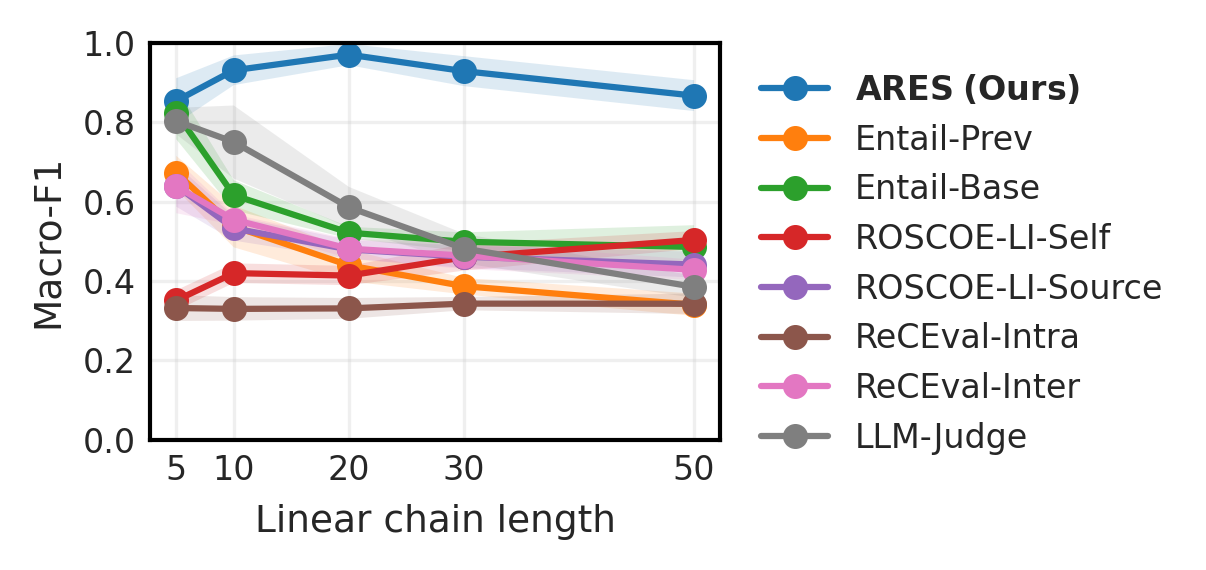

In [8]:
# ── FIGURE: TREND LINES WITH ±1 STD SHADE ───────────────────────────────────
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt

# Option 1: using rcParams directly

# ——— Style setup —————————————————————————————————————————————
plt.style.use('seaborn-whitegrid')                # clean grid background
plt.rcParams.update({
    "font.family": "DejaVu Sans",
    "axes.titlesize": 10,
    "axes.labelsize": 9,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "legend.fontsize": 8,
    "figure.dpi": 300,                            # crisper rendering
    "lines.linewidth": 1.5,
    "lines.markersize": 5,
    "axes.edgecolor": "black",
})
# plt.rcParams['font.size']   = 8

# # Optionally customize specific elements:
# plt.rcParams['axes.titlesize']   = 8
# plt.rcParams['axes.labelsize']   = 8
# plt.rcParams['xtick.labelsize']  = 8
# plt.rcParams['ytick.labelsize']  = 8
# plt.rcParams['legend.fontsize']  = 8

# ('ROSCOE-LI-Self',  r'ROSCOE-LI-Self'),
#     ('ROSCOE-LI-Source',  r'ROSCOE-LI-Source'),
#     ('ReCEval-Intra',  r'ReCEval-Intra'),
#     ('ReCEval-Inter',  r'ReCEval-Inter'),

ourdata_name = 'ClaimTrees'

display_name_mapping = {
    r'\cert{}': r"$\mathbf{ARES\;(Ours)}$",
    r'\entailprev{}': 'Entail-Prev',
    r'\entailraw{}': 'Entail-Base',
    r'ROSCOE-LI-Self-Contra': 'ROSCOE-LI-Self',
    r'ROSCOE-LI-Source-Contra': 'ROSCOE-LI-Source',
    r'ReCEval-Intra': 'ReCEval-Intra',
    r'ReCEval-Inter-Contra': 'ReCEval-Inter',
    r'\llmjudge{}': 'LLM-Judge',
    r'\prm{}': 'PRM'
}

metric_key = "f1"                                   # or "rec" / "prec"
datasets_order = list(dataset_name_map.keys())      # preserves your chosen order
x_labels       = [dataset_name_map[d].replace(r'\ourdata{}', ourdata_name) for d in datasets_order]
# x_pos          = np.arange(len(datasets_order))
x_pos = [int(item.split('-')[-1]) for item in x_labels]

plt.figure(figsize=(2.6, 2.0))
for method_key, disp_name in name_mapping.items():
    # print(method_key, disp_name)
    y_means, y_stds = [], []
    for ds in datasets_order:
        ds_res = results_by_model[model].get(ds, {})
        # print(ds_res)
        if method_key not in ds_res:
            y_means.append(np.nan)
            y_stds.append(np.nan)
            continue
        vals = np.asarray(ds_res[method_key][metric_key])
        y_means.append(vals.mean())
        y_stds.append(vals.std(ddof=1))
    
    if np.isnan(y_means[0]):
        continue

    y_means = np.array(y_means, dtype=float)
    y_stds  = np.array(y_stds,  dtype=float)

    # main line
    for k, v in display_name_mapping.items():
        disp_name = disp_name.replace(k, v)
    plt.plot(x_pos, y_means, marker="o", label=disp_name)
    # shaded ±1 σ band (Matplotlib skips NaNs automatically)
    plt.fill_between(x_pos, y_means - y_stds, y_means + y_stds,
                     alpha=0.15, linewidth=0)
plt.xticks(x_pos, x_pos)
plt.xlabel('Linear chain length')
# plt.xticks(x_pos, x_labels, rotation=30, ha="right")
plt.ylabel(f"Macro-{metric_key.upper()}")
plt.ylim(0, 1)                      # adjust if necessary
plt.grid(alpha=0.3)
# plt.grid(False)
plt.tight_layout()
plt.legend(title=None, bbox_to_anchor=(1.02, 1),
           loc="upper left", frameon=False)
# plt.title(f"Trend of {metric_key.upper()} across datasets\n(mean ± 1 SD)")
plt.savefig('figures/long_chains.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


In [9]:
# ── Export Plotly JSON for the ClaimTrees figure ───────────────────────────────
import json, os
import numpy as np
import matplotlib as mpl

def _to_serializable_list(arr):
    """Convert a 1D array/list to JSON-safe Python list (NaN -> None)."""
    out = []
    for v in np.asarray(arr).tolist():
        if v is None:
            out.append(None)
        else:
            try:
                if np.isnan(v):
                    out.append(None)
                else:
                    out.append(float(v))
            except Exception:
                out.append(v)
    return out

def make_plotly_json_for_claimtrees(
    results_by_model,
    model,
    dataset_name_map,
    name_mapping,                  # dict: method_key -> display template (your loop order)
    display_name_mapping,          # replacements for nicer labels
    metric_key="f1",
    ourdata_name="ClaimTrees",
    out_path="assets/images/ares/claimtrees_gpt-4o-mini.json",
    include_bands=True,            # also write y_low/y_high from ±SD
    k_sd=1.0                       # band width multiplier (1 = ±1 SD)
):
    # 1) X axis (linear chain lengths) from your labels
    datasets_order = list(dataset_name_map.keys())  # preserve your order
    x_labels = [dataset_name_map[d].replace(r'\ourdata{}', ourdata_name)
                for d in datasets_order]
    x = [int(lbl.split('-')[-1]) for lbl in x_labels]

    # 2) Matplotlib color cycle — same colors as your plot
    color_cycle = [d['color'] for d in mpl.rcParams['axes.prop_cycle']]
    # If there are more series than the default cycle, it will wrap automatically
    def color_for_index(i):
        return color_cycle[i % len(color_cycle)]

    # 3) Build series
    series = []
    for idx, (method_key, disp_name) in enumerate(name_mapping.items()):
        y_means, y_stds = [], []
        for ds in datasets_order:
            ds_res = results_by_model[model].get(ds, {})
            if method_key not in ds_res:
                y_means.append(np.nan)
                y_stds.append(np.nan)
                continue
            vals = np.asarray(ds_res[method_key][metric_key], dtype=float)
            y_means.append(np.nanmean(vals))
            y_stds.append(np.nanstd(vals, ddof=1))

        # skip methods with no data at all
        if all(np.isnan(y_means)):
            continue

        # Pretty name replacements (same as your plotting cell)
        for k, v in display_name_mapping.items():
            disp_name = disp_name.replace(k, v)

        color = color_for_index(idx)

        y_means = np.array(y_means, dtype=float)
        y_stds  = np.array(y_stds,  dtype=float)

        entry = {
            "name":  disp_name,
            "color": color,
            "y":     _to_serializable_list(y_means),
            "y_sd":  _to_serializable_list(y_stds),
        }

        if include_bands:
            y_low  = y_means - k_sd * y_stds
            y_high = y_means + k_sd * y_stds
            entry["y_low"]  = _to_serializable_list(y_low)
            entry["y_high"] = _to_serializable_list(y_high)

        series.append(entry)

    # 4) Final JSON structure
    payload = {
        "x": x,
        "x_label": "Linear chain length",
        "y_label": f"Macro-{metric_key.upper()}",
        "series": series
    }

    # 5) Ensure folder exists, then write JSON
    os.makedirs(os.path.dirname(out_path), exist_ok=True)
    with open(out_path, "w", encoding="utf-8") as f:
        json.dump(payload, f, ensure_ascii=False, indent=2)

    print(f"Wrote Plotly JSON → {out_path}")

# ── Run it
make_plotly_json_for_claimtrees(
    results_by_model=results_by_model,
    model=model,
    dataset_name_map=dataset_name_map,
    name_mapping=name_mapping,
    display_name_mapping=display_name_mapping,
    metric_key="f1",
    ourdata_name=ourdata_name,
    out_path="figures/claimtrees_gpt-4o-mini.json",
    include_bands=True,   # so Plotly shows shaded band + error bars
    k_sd=1.0              # ±1 SD; change to 1.96 for ~95% if you switch to SEM
)


Wrote Plotly JSON → figures/claimtrees_gpt-4o-mini.json


/tmp/ipykernel_99015/3406431442.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')                # clean grid background


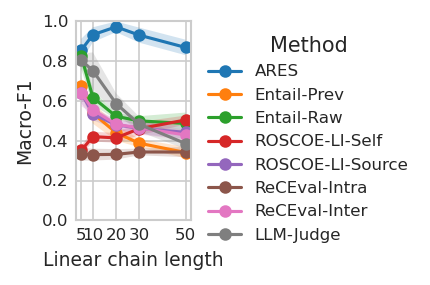

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# ——— Style setup —————————————————————————————————————————————
plt.style.use('seaborn-whitegrid')                # clean grid background
plt.rcParams.update({
    "font.family": "DejaVu Sans",
    "axes.titlesize": 10,
    "axes.labelsize": 9,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "legend.fontsize": 8,
    "figure.dpi": 150,                            # crisper rendering
    "lines.linewidth": 1.5,
    "lines.markersize": 5,
})

# ——— Data prep (unchanged) —————————————————————————————————————
ourdata_name = 'ClaimTrees'
display_name_mapping = {
    r'\cert{}': 'ARES',
    r'\entailprev{}': 'Entail-Prev',
    r'\entailraw{}': 'Entail-Raw',
    r'ROSCOE-LI-Self-Contra': 'ROSCOE-LI-Self',
    r'ROSCOE-LI-Source-Contra': 'ROSCOE-LI-Source',
    r'ReCEval-Intra': 'ReCEval-Intra',
    r'ReCEval-Inter-Contra': 'ReCEval-Inter',
    r'\llmjudge{}': 'LLM-Judge',
    r'\prm{}': 'PRM'
}
metric_key    = "f1"
datasets_order = list(dataset_name_map.keys())
x_labels       = [dataset_name_map[d].replace(r'\ourdata{}', ourdata_name)
                  for d in datasets_order]
x_pos          = [int(lbl.split('-')[-1]) for lbl in x_labels]

# ——— Plotting ————————————————————————————————————————————————
fig, ax = plt.subplots(figsize=(3, 2))

for method_key, raw_name in name_mapping.items():
    # compute mean & std
    means, stds = [], []
    for ds in datasets_order:
        vals = results_by_model[model].get(ds, {}).get(method_key, {}).get(metric_key, None)
        if vals is None:
            means.append(np.nan); stds.append(np.nan)
        else:
            arr = np.array(vals, dtype=float)
            means.append(arr.mean())
            stds.append(arr.std(ddof=1))
    means, stds = np.array(means), np.array(stds)
    if np.all(np.isnan(means)):  # skip methods with no data
        continue

    # display-name replacement
    disp = raw_name
    for k,v in display_name_mapping.items():
        disp = disp.replace(k, v)

    # plot line + shaded band
    ax.plot(x_pos, means, marker='o', label=disp)
    ax.fill_between(x_pos,
                    means - stds,
                    means + stds,
                    alpha=0.2,
                    linewidth=0)

# ——— Axes & legend tweaks ————————————————————————————————————
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_xlabel('Linear chain length')
ax.set_ylabel(f"Macro-{metric_key.upper()}")
ax.set_ylim(0, 1)
ax.legend(title="Method",
          loc="upper left",
          bbox_to_anchor=(1.02, 1),
          frameon=False)
plt.savefig('figures/long_chains.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.tight_layout()
plt.show()


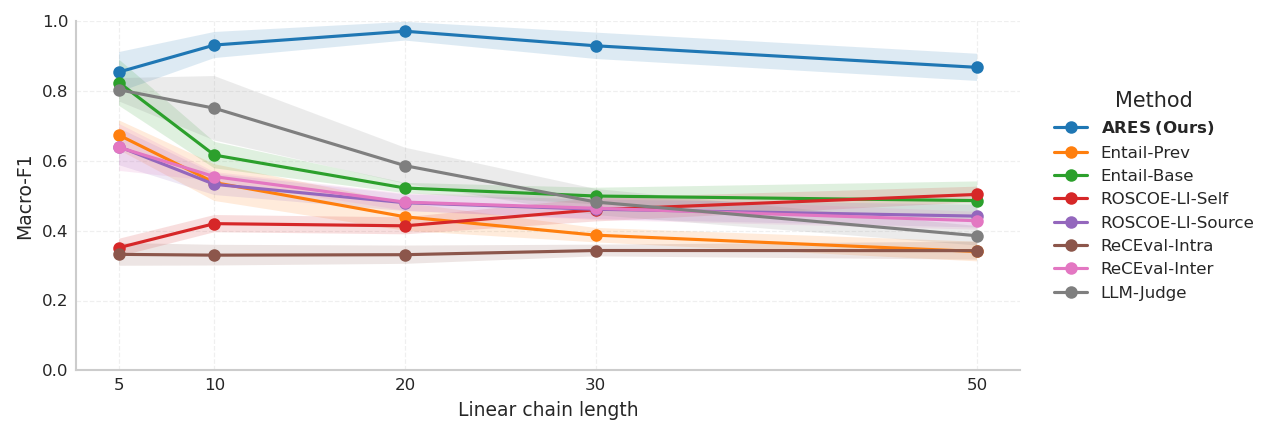

In [18]:
# ── FIGURE: TREND LINES WITH ±1 STD SHADE ───────────────────────────────────
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt

# Option 1: using rcParams directly
plt.rcParams['font.family'] = 'DejaVu Sans'
# plt.rcParams['font.size']   = 8

# # Optionally customize specific elements:
# plt.rcParams['axes.titlesize']   = 8
# plt.rcParams['axes.labelsize']   = 8
# plt.rcParams['xtick.labelsize']  = 8
# plt.rcParams['ytick.labelsize']  = 8
# plt.rcParams['legend.fontsize']  = 8

ourdata_name = 'ClaimTrees'

display_name_mapping = {
    r'\cert{}': r"$\mathbf{ARES\;(Ours)}$",
    r'\entailprev{}': 'Entail-Prev',
    r'\entailraw{}': 'Entail-Base',
    r'ROSCOE-LI-Self-Contra': 'ROSCOE-LI-Self',
    r'ROSCOE-LI-Source-Contra': 'ROSCOE-LI-Source',
    r'ReCEval-Intra': 'ReCEval-Intra',
    r'ReCEval-Inter-Contra': 'ReCEval-Inter',
    r'\llmjudge{}': 'LLM-Judge',
    r'\prm{}': 'PRM'
}

metric_key = "f1"                                   # or "rec" / "prec"
datasets_order = list(dataset_name_map.keys())      # preserves your chosen order
x_labels       = [dataset_name_map[d].replace(r'\ourdata{}', ourdata_name) for d in datasets_order]
# x_pos          = np.arange(len(datasets_order))
x_pos = [int(item.split('-')[-1]) for item in x_labels]

# plt.figure(figsize=(2.6, 2.0))
plt.figure(figsize=(7, 3))
for method_key, disp_name in name_mapping.items():
    # print(method_key, disp_name)
    y_means, y_stds = [], []
    for ds in datasets_order:
        ds_res = results_by_model[model].get(ds, {})
        # print(ds_res)
        if method_key not in ds_res:
            y_means.append(np.nan)
            y_stds.append(np.nan)
            continue
        vals = np.asarray(ds_res[method_key][metric_key])
        y_means.append(vals.mean())
        y_stds.append(vals.std(ddof=1))
    
    if np.isnan(y_means[0]):
        continue

    y_means = np.array(y_means, dtype=float)
    y_stds  = np.array(y_stds,  dtype=float)

    # main line
    for k, v in display_name_mapping.items():
        disp_name = disp_name.replace(k, v)
    plt.plot(x_pos, y_means, marker="o", label=disp_name)
    # shaded ±1 σ band (Matplotlib skips NaNs automatically)
    plt.fill_between(x_pos, y_means - y_stds, y_means + y_stds,
                     alpha=0.15, linewidth=0)
# axes, grid, legend
plt.xticks(x_pos, x_pos)                 # or custom labels
plt.xlabel('Linear chain length')
plt.ylabel(f"Macro-{metric_key.upper()}")
plt.ylim(0, 1)
plt.grid(alpha=0.3, linestyle='--', linewidth=0.6)

# ── show only bottom + left spines ──────────────────────────────
for spine in ('top', 'right'):
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()

plt.legend(
    title="Method",
    bbox_to_anchor=(1.02, 0.5),
    loc="center left",
    frameon=False          # no legend border
)

plt.savefig('figures/long_chains_wide.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()



/tmp/ipykernel_2664435/1113750926.py:82: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


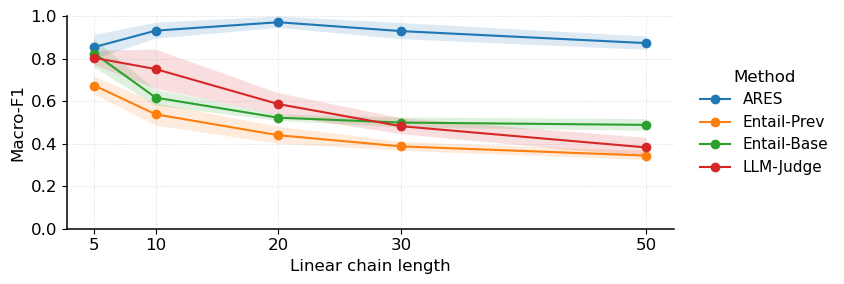

In [17]:
# ── FIGURE: TREND LINES WITH ±1 STD SHADE ───────────────────────────────────
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt

# Option 1: using rcParams directly
plt.rcParams['font.family'] = 'DejaVu Sans'
# plt.rcParams['font.size']   = 8

# # Optionally customize specific elements:
# plt.rcParams['axes.titlesize']   = 8
# plt.rcParams['axes.labelsize']   = 8
# plt.rcParams['xtick.labelsize']  = 8
# plt.rcParams['ytick.labelsize']  = 8
# plt.rcParams['legend.fontsize']  = 8

plt.rcParams.update({
    "font.size": 12,
    "axes.labelsize": 12,
    "axes.titlesize": 14,
    "legend.fontsize": 11,
    "axes.linewidth": 1.1,
})

ourdata_name = 'ClaimTrees'

display_name_mapping = {
    r'\cert{}': 'ARES',
    r'\entailprev{}': 'Entail-Prev',
    r'\entailraw{}': 'Entail-Base',
    r'\llmjudge{}': 'LLM-Judge',
    r'\prm{}': 'PRM'
}

metric_key = "f1"                                   # or "rec" / "prec"
datasets_order = list(dataset_name_map.keys())      # preserves your chosen order
x_labels       = [dataset_name_map[d].replace(r'\ourdata{}', ourdata_name) for d in datasets_order]
# x_pos          = np.arange(len(datasets_order))
x_pos = [int(item.split('-')[-1]) for item in x_labels]

# plt.figure(figsize=(2.6, 2.0))
plt.figure(figsize=(7, 3), constrained_layout=True)
for method_key, disp_name in name_mapping.items():
    # print(method_key, disp_name)
    y_means, y_stds = [], []
    for ds in datasets_order:
        ds_res = results_by_model[model].get(ds, {})
        # print(ds_res)
        if method_key not in ds_res:
            y_means.append(np.nan)
            y_stds.append(np.nan)
            continue
        vals = np.asarray(ds_res[method_key][metric_key])
        y_means.append(vals.mean())
        y_stds.append(vals.std(ddof=1))
    
    if np.isnan(y_means[0]):
        continue

    y_means = np.array(y_means, dtype=float)
    y_stds  = np.array(y_stds,  dtype=float)

    # main line
    for k, v in display_name_mapping.items():
        disp_name = disp_name.replace(k, v)
    plt.plot(x_pos, y_means, marker="o", label=disp_name)
    # shaded ±1 σ band (Matplotlib skips NaNs automatically)
    plt.fill_between(x_pos, y_means - y_stds, y_means + y_stds,
                     alpha=0.15, linewidth=0)
# axes, grid, legend
plt.xticks(x_pos, x_pos)                 # or custom labels
plt.xlabel('Linear chain length')
plt.ylabel(f"Macro-{metric_key.upper()}")
plt.ylim(0, 1)
plt.grid(alpha=0.3, linestyle='--', linewidth=0.6)

# ── show only bottom + left spines ──────────────────────────────
for spine in ('top', 'right'):
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()

plt.legend(
    title="Method",
    bbox_to_anchor=(1.02, 0.5),
    loc="center left",
    frameon=False          # no legend border
)

plt.savefig('figures/long_chains.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

